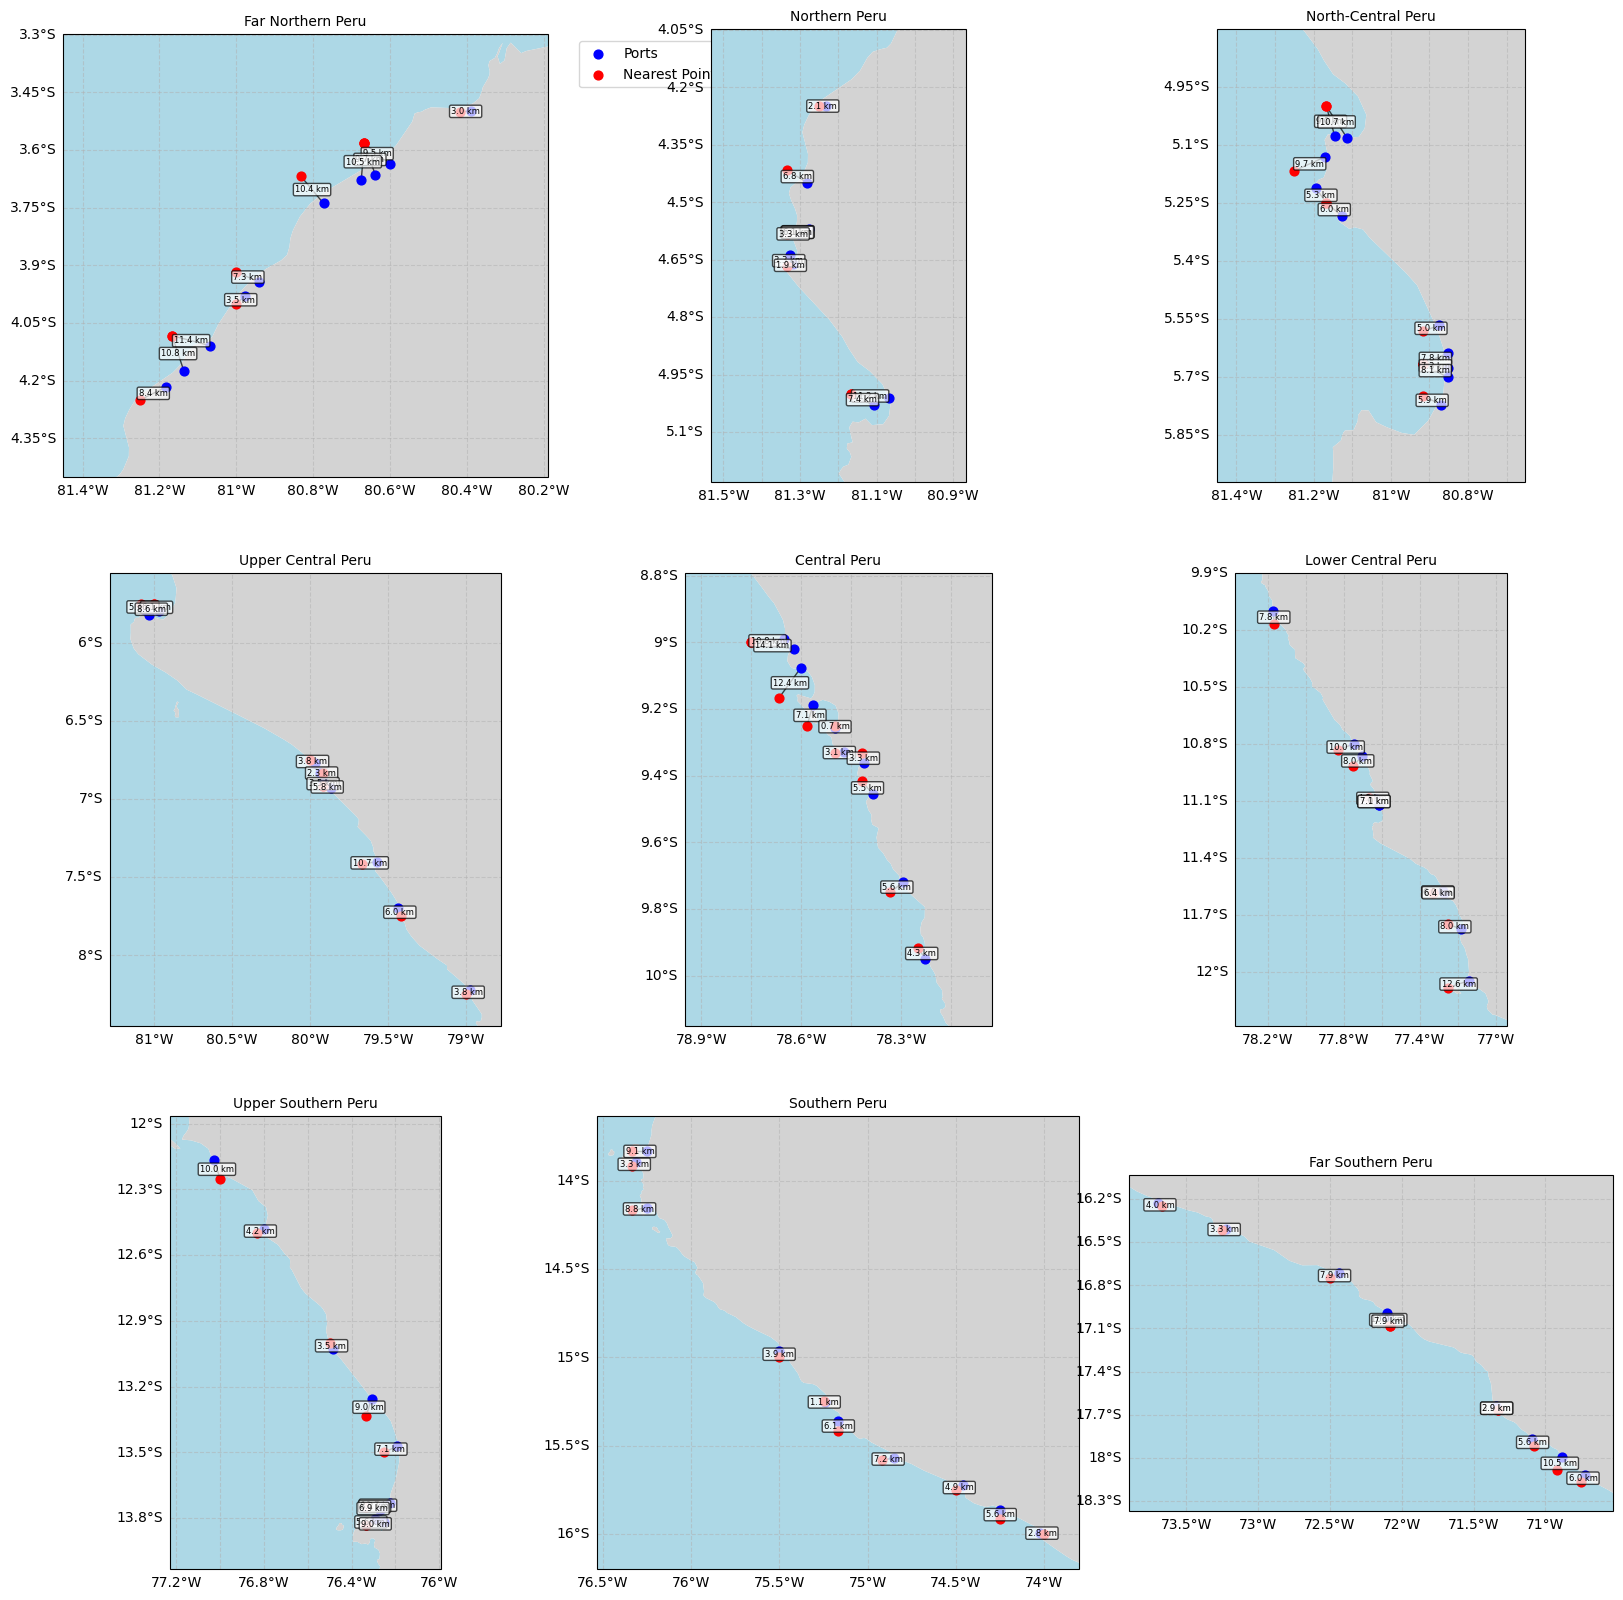

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

gph_distance_112 = pd.read_csv('gph_distance_112.csv')
gph_distance = gph_distance_112.copy()
gph_distance_sorted = gph_distance.sort_values(by = 'latitude', ascending = False)
segment_size = len(gph_distance_sorted) // 9
segments = []

for i in range(9):
    start_idx = i * segment_size
    end_idx = start_idx + segment_size if i < 8 else len(gph_distance_sorted)
    segments.append(gph_distance_sorted.iloc[start_idx : end_idx])

fig, axes = plt.subplots(3, 3, figsize = (20, 20), subplot_kw = {'projection': ccrs.PlateCarree()})
segment_names = ['Far Northern Peru', 'Northern Peru', 'North-Central Peru', 'Upper Central Peru', 'Central Peru', 'Lower Central Peru', 'Upper Southern Peru', 'Southern Peru', 'Far Southern Peru']

for i, segment_data in enumerate(segments):
    ax = axes[i // 3, i % 3]
#    ax.add_feature(cfeature.LAND, facecolor = 'lightgray')
    ax.add_feature(cfeature.OCEAN, facecolor = 'lightblue')
#    ax.add_feature(cfeature.GSHHSFeature(scale = 'high', levels = [1]), linewidth = 0.8, edgecolor = 'black')
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m'), facecolor = 'lightgray')
#    ax.add_feature(cfeature.NaturalEarthFeature('cultural', 'admin_0_boundary_lines_land', '10m'), linewidth = 0.6)

    ax.scatter(segment_data['longitude'], segment_data['latitude'], color = 'blue', s = 40, label = 'Ports', transform = ccrs.PlateCarree(), zorder = 3)
    ax.scatter(segment_data['nearest_longitude'], segment_data['nearest_latitude'], color = 'red', s = 40, label = 'Nearest Points', transform = ccrs.PlateCarree(), zorder = 3)
    
    for _, row in segment_data.iterrows():
        ax.plot([row['longitude'], row['nearest_longitude']], [row['latitude'], row['nearest_latitude']], 'k-', alpha = 0.7, linewidth = 1.0, transform = ccrs.PlateCarree(), zorder = 2)
        mid_lon = (row['longitude'] + row['nearest_longitude']) / 2
        mid_lat = (row['latitude'] + row['nearest_latitude']) / 2
        ax.text(mid_lon, mid_lat, f"{row['port_distance_112']:.1f} km", fontsize = 6, ha = 'center', va = 'center', transform = ccrs.PlateCarree(), bbox = dict(facecolor = 'white', alpha = 0.7, boxstyle = 'round,pad=0.2'))
    
    padding = 0.2
    min_lon = min(segment_data['longitude'].min(), segment_data['nearest_longitude'].min()) - padding
    max_lon = max(segment_data['longitude'].max(), segment_data['nearest_longitude'].max()) + padding
    min_lat = min(segment_data['latitude'].min(), segment_data['nearest_latitude'].min()) - padding
    max_lat = max(segment_data['latitude'].max(), segment_data['nearest_latitude'].max()) + padding
    ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs = ccrs.PlateCarree())
    gl = ax.gridlines(draw_labels = True, linestyle = '--', alpha = 0.5)
    gl.top_labels = False
    gl.right_labels = False
    ax.set_title(segment_names[i], fontsize = 10)
    
    # Mover la leyenda hacia la derecha solo en la primera gráfica
    if i == 0:
        ax.legend(loc = 'upper left', bbox_to_anchor = (1.05, 1.0))

# Ajustar el espacio entre gráficos
fig.subplots_adjust(wspace = 0.1, hspace = 0.2)

plt.show()
fig.savefig('port_distances_peru.png', dpi = 400)
fig.savefig('port_distances_peru.pdf')
